In [1]:
#import modules for analyzing ,plotting, and formatting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns


In [2]:
original_tf_data = pd.read_csv("first_upload.csv")

df = pd.DataFrame(original_tf_data, columns=['ID Number','Gender','Grade Level','Season','400 Meters','800 Meters','1500 Meters','1600 Meters'])
columnsTitles = ['ID Number','Gender','Grade Level','Season','400 Meters','800 Meters','1500 Meters','1600 Meters']
original_tf_df = df.reindex(columns=columnsTitles)

original_tf_df
copy_df = original_tf_df.copy()

In [3]:
copy_df

,ID Number,Gender,Grade Level,Season,400 Meters,800 Meters,1500 Meters,1600 Meters
0,21,M,12th Grade,2007 Outdoor Season,57.74,NaN,NaN,NaN
1,21,M,12th Grade,2007 Outdoor Season,57.34c,NaN,NaN,NaN
2,21,M,12th Grade,2007 Outdoor Season,56.14c,NaN,NaN,NaN
3,21,M,12th Grade,2007 Outdoor Season,57.2h,NaN,NaN,NaN
4,21,M,12th Grade,2007 Outdoor Season,58.8h,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
41784,19989,M,12th Grade,2005 Outdoor Season,54.14c,NaN,NaN,NaN
41785,19991,M,12th Grade,2005 Outdoor Season,NaN,3:27.3h,NaN,NaN
41786,19991,M,12th Grade,2005 Outdoor Season,NaN,3:14.3h,NaN,NaN
41787,19991,M,12th Grade,2005 Outdoor Season,NaN,3:21.5h,NaN,NaN


In [4]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41789 entries, 0 to 41788
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID Number    41789 non-null  int64 
 1   Gender       41789 non-null  object
 2   Grade Level  41789 non-null  object
 3   Season       41789 non-null  object
 4   400 Meters   14362 non-null  object
 5   800 Meters   12910 non-null  object
 6   1500 Meters  14315 non-null  object
 7   1600 Meters  200 non-null    object
dtypes: int64(1), object(7)
memory usage: 2.6+ MB


In [5]:
# this is the laters version of these def I am running

null_times = {np.nan,'nan','DNR','nt','no time','FS','DQ','NT','SCR','DNS','DNF','na','MB', 'shot 29.9', 'NS', '?'}

def time_convert(x):
    if (str(x)[-1]=='c') or (str(x)[-1]=='h'):
        x = str(x)[:-1] 
    x_split = str(x).split(':')
    if not '.' in x_split[-1]:
        x = str(x) + '.00'
    #print(x)
    ##Annoying edge cases
    if (x_split[-1] == '60.00') or (x_split[-1] =='60.0') or (x_split[-1] == '28/0'):
      #print('here')
      return np.nan

    if (x[-1] == 'a'):
      #print('here')
      return(np.nan)

    if (str(x) == '57.4**'):
      #print(x)
      return(np.nan)

    if len(x_split)==1:
        t = datetime.datetime.strptime(x, '%S.%f').time()
        return((t.hour * 60 + t.minute) *60 + t.second+ 0.000001*t.microsecond)

    if len(x_split)==2:
      t = datetime.datetime.strptime(x, '%M:%S.%f').time()
      return((t.hour * 60 + t.minute) *60 + t.second+ 0.000001*t.microsecond)

    if len(x_split)==3:
        t = datetime.datetime.strptime(x, '%H:%M:%S.%f').time()
        return((t.hour * 60 + t.minute) *60 + t.second+ 0.000001*t.microsecond)
  

In [6]:
#One dataframe for each event
#here we are doing the final filtering of these df's
#by using a list of wrongly input features, we can check if those values are in any 
#row of these 400m cols. if it is, it is filtered out using the '~'. 
#finally, convert time is applied to convert each input time to seconds. 

df_400 = copy_df[['ID Number', 'Gender', 'Grade Level', 'Season', '400 Meters']]
df_400 = df_400[~df_400['400 Meters'].isin(null_times)]
df_400['400 Meters'] = df_400['400 Meters'].apply(time_convert)

df_800 = copy_df[['ID Number', 'Gender', 'Grade Level', 'Season', '800 Meters']]
df_800 = df_800[~df_800['800 Meters'].isin(null_times)]
df_800['800 Meters'] = df_800['800 Meters'].apply(time_convert)

df_1500 = copy_df[['ID Number', 'Gender', 'Grade Level', 'Season', '1500 Meters']]
df_1500 = df_1500[~df_1500['1500 Meters'].isin(null_times)]
df_1500['1500 Meters'] = df_1500['1500 Meters'].apply(time_convert)

df_1600 = copy_df[['ID Number', 'Gender', 'Grade Level', 'Season', '1600 Meters']]
df_1600 = df_1600[~df_1600['1600 Meters'].isin(null_times)]

df_1600['1600 Meters'] = df_1600['1600 Meters'].apply(time_convert)

In [7]:
df_1600.info()
df_1600[(df_1600['1600 Meters']>500) | (df_1600['1600 Meters']<100)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 158 to 41559
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID Number    196 non-null    int64  
 1   Gender       196 non-null    object 
 2   Grade Level  196 non-null    object 
 3   Season       196 non-null    object 
 4   1600 Meters  195 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 9.2+ KB


,ID Number,Gender,Grade Level,Season,1600 Meters
5324,2325,M,11th Grade,2005 Outdoor Season,57.8
5341,2326,M,10th Grade,2005 Outdoor Season,56.3
5356,2328,M,12th Grade,2005 Outdoor Season,56.6
5418,2329,M,10th Grade,2005 Outdoor Season,55.6
5437,2331,M,12th Grade,2005 Outdoor Season,57.6
14911,6342,M,12th Grade,2004 Outdoor Season,53.0
14940,6344,M,12th Grade,2004 Outdoor Season,56.0
14958,6345,M,12th Grade,2004 Outdoor Season,54.0
15014,6346,M,10th Grade,2004 Outdoor Season,56.0
16508,7083,M,10th Grade,2004 Outdoor Season,5.0


In [8]:
df_1500.info()
df_1500[(df_1500['1500 Meters']>500) | (df_1500['1500 Meters']<100)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14195 entries, 72 to 41777
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID Number    14195 non-null  int64  
 1   Gender       14195 non-null  object 
 2   Grade Level  14195 non-null  object 
 3   Season       14195 non-null  object 
 4   1500 Meters  14188 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 665.4+ KB


,ID Number,Gender,Grade Level,Season,1500 Meters
971,652,M,9th Grade,2004 Outdoor Season,815.70
1303,726,M,11th Grade,2004 Outdoor Season,579.54
4260,1727,M,12th Grade,2004 Outdoor Season,534.20
5448,2336,M,9th Grade,2004 Outdoor Season,534.30
10224,4204,M,9th Grade,2004 Outdoor Season,1666.00
14035,5891,M,9th Grade,2004 Outdoor Season,0.00
16730,7349,M,9th Grade,2004 Outdoor Season,616.50
16783,7400,M,12th Grade,2005 Outdoor Season,61.70
18023,8086,M,12th Grade,2007 Outdoor Season,509.60
18650,8501,M,12th Grade,2004 Outdoor Season,571.00


In [9]:
df_800.info()
df_800[(df_800['800 Meters']>250) | (df_800['800 Meters']<50)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12783 entries, 12 to 41788
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID Number    12783 non-null  int64  
 1   Gender       12783 non-null  object 
 2   Grade Level  12783 non-null  object 
 3   Season       12783 non-null  object 
 4   800 Meters   12782 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 599.2+ KB


,ID Number,Gender,Grade Level,Season,800 Meters
1081,690,M,12th Grade,2004 Outdoor Season,325.30
4428,1845,M,9th Grade,2004 Outdoor Season,385.12
10182,4193,M,11th Grade,2005 Outdoor Season,1322.00
18712,8547,M,12th Grade,2008 Outdoor Season,266.90
18957,8669,M,10th Grade,2004 Outdoor Season,382.00
19358,8988,M,12th Grade,2005 Outdoor Season,268.90
19359,8988,M,12th Grade,2005 Outdoor Season,261.34
19360,8988,M,12th Grade,2005 Outdoor Season,276.13
19485,9103,M,9th Grade,2004 Outdoor Season,3178.00
21124,10335,M,10th Grade,2006 Outdoor Season,750.60


In [10]:
df_400.info()
#There is something wrong with these 15 out of 14k in how their times were reported
df_400[(df_400['400 Meters']>180) | (df_400['400 Meters']<40)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14223 entries, 0 to 41784
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID Number    14223 non-null  int64  
 1   Gender       14223 non-null  object 
 2   Grade Level  14223 non-null  object 
 3   Season       14223 non-null  object 
 4   400 Meters   14188 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 666.7+ KB


,ID Number,Gender,Grade Level,Season,400 Meters
8570,3580,M,11th Grade,2005 Outdoor Season,3304.00
10159,4193,M,12th Grade,2006 Outdoor Season,3213.14
15147,6416,M,12th Grade,2005 Outdoor Season,3694.14
15543,6657,M,9th Grade,2004 Outdoor Season,3573.00
16189,6988,M,9th Grade,2004 Outdoor Season,3375.14
16190,6988,M,9th Grade,2004 Outdoor Season,3429.14
18396,8322,M,10th Grade,2004 Outdoor Season,12.24
18974,8676,M,11th Grade,2005 Outdoor Season,5775.14
26686,12583,M,11th Grade,2007 Outdoor Season,3309.00
27009,12633,M,9th Grade,2005 Outdoor Season,3574.14


To analyze this dataset, we will be looking at how the runners have changed over time. Specifically we will answer the questions:
1. how has the pop of runners changed over the seasons.
2. how has their performance changed( min, max, mean) by season.
3. how does a 9th grader perform in a recent season vs one in the earliest season.



In [11]:
df_8 = df_800[(df_800['800 Meters']<250) & (df_800['800 Meters']>50)]
df_8.head()

,ID Number,Gender,Grade Level,Season,800 Meters
12,21,M,12th Grade,2007 Outdoor Season,134.20
14,21,M,12th Grade,2007 Outdoor Season,129.50
15,21,M,12th Grade,2007 Outdoor Season,130.14
16,21,M,12th Grade,2007 Outdoor Season,127.35
31,21,M,11th Grade,2006 Outdoor Season,140.80


In [12]:
df_8.shape

(12763, 5)

In [13]:
df_8["Season"] = df_8["Season"].str.strip()  # strip leading/trailing whitespace

# check the unique values in the "Season" column again
print(df_8["Season"].unique())

['2007 Outdoor Season' '2006 Outdoor Season' '2005 Outdoor Season'
 '2004 Outdoor Season' '2003 Outdoor  Season' '2002 Outdoor  Season'
 '1998 Outdoor  Season' '1997 Outdoor  Season' '1996 Outdoor  Season'
 '2008 Outdoor Season' '2000 Outdoor  Season' '1999 Outdoor  Season'
 '1995 Outdoor  Season' '2001 Outdoor  Season' '2009 Outdoor Season'
 '2007 Indoor Season' '2006 Indoor Season' '2004 Indoor Season'
 '2005 Indoor Season' '2008 Indoor Season' '2010 Outdoor Season']


<ipython-input-13-7378479a2ee2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8["Season"] = df_8["Season"].str.strip()  # strip leading/trailing whitespace


In [14]:
print(df_8['Season'].unique())

['2007 Outdoor Season' '2006 Outdoor Season' '2005 Outdoor Season'
 '2004 Outdoor Season' '2003 Outdoor  Season' '2002 Outdoor  Season'
 '1998 Outdoor  Season' '1997 Outdoor  Season' '1996 Outdoor  Season'
 '2008 Outdoor Season' '2000 Outdoor  Season' '1999 Outdoor  Season'
 '1995 Outdoor  Season' '2001 Outdoor  Season' '2009 Outdoor Season'
 '2007 Indoor Season' '2006 Indoor Season' '2004 Indoor Season'
 '2005 Indoor Season' '2008 Indoor Season' '2010 Outdoor Season']


In [15]:
pd.set_option("display.max_rows", None)   # show all rows
pd.set_option("display.max_columns", None)  # show all columns

pop = df_8.groupby(['Season', 'Grade Level'])['ID Number'].nunique()
print(pop)

Season                Grade Level
1995 Outdoor  Season  11th Grade       1
                      9th Grade        1
1996 Outdoor  Season  10th Grade       1
                      9th Grade        1
1997 Outdoor  Season  10th Grade       1
                      11th Grade       2
                      12th Grade       1
1998 Outdoor  Season  10th Grade       1
                      11th Grade       1
                      12th Grade       1
1999 Outdoor  Season  9th Grade        1
2000 Outdoor  Season  10th Grade       1
                      11th Grade       1
                      12th Grade       1
2001 Outdoor  Season  9th Grade        8
2002 Outdoor  Season  10th Grade       8
                      11th Grade       2
                      9th Grade       19
2003 Outdoor  Season  10th Grade      26
                      11th Grade      19
                      9th Grade       15
2004 Indoor Season    10th Grade       1
                      12th Grade       4
2004 Outdoor Season   1

From the output above we can see that the data is sparse. This tells us that all the columns will not be especially informative. But, we see that the outdoor season for years 2004, 2005, 2006 and maybe 2007 will give us accurate representation for each grade level. 

Because we are only looking at these 4 years, I will index for these seasons so the outputs are more clear.

In [16]:
min_df = df_8[(df_8['Season'] >= '2004 Outdoor Season') & (df_8['Season'] <= '2007 Outdoor Season')]
min_df.head()

,ID Number,Gender,Grade Level,Season,800 Meters
12,21,M,12th Grade,2007 Outdoor Season,134.20
14,21,M,12th Grade,2007 Outdoor Season,129.50
15,21,M,12th Grade,2007 Outdoor Season,130.14
16,21,M,12th Grade,2007 Outdoor Season,127.35
31,21,M,11th Grade,2006 Outdoor Season,140.80


In [17]:
out = min_df[min_df['Grade Level'] == '?'].index
min_df.drop(index=(out), inplace=True)

<ipython-input-17-c9c0d1dbff97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_df.drop(index=(out), inplace=True)


In [18]:
in_05 = min_df[min_df['Season'] == '2005 Indoor Season'].index
in_06 = min_df[min_df['Season'] == '2006 Indoor Season'].index
in_07 = min_df[min_df['Season'] == '2007 Indoor Season'].index

min_df.drop(index=(in_05), inplace=True)
min_df.drop(index=(in_06), inplace=True)
min_df.drop(index=(in_07), inplace=True)

<ipython-input-18-880a71f56c52>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_df.drop(index=(in_05), inplace=True)
<ipython-input-18-880a71f56c52>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_df.drop(index=(in_06), inplace=True)
<ipython-input-18-880a71f56c52>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_df.drop(index=(in_07), inplace=True)


In [19]:
gr_7 = min_df[min_df['Grade Level'] == '7th Grade'].index
gr_8 = min_df[min_df['Grade Level'] == '8th Grade'].index

min_df.drop(index=(gr_7), inplace=True)
min_df.drop(index=(gr_8), inplace=True)

<ipython-input-19-d3e7eaadabdf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_df.drop(index=(gr_7), inplace=True)
<ipython-input-19-d3e7eaadabdf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_df.drop(index=(gr_8), inplace=True)


In [20]:
pop_min = min_df.groupby(['Season', 'Grade Level'])['ID Number'].nunique()
print(pop_min)

Season               Grade Level
2004 Outdoor Season  10th Grade     212
                     11th Grade     217
                     12th Grade     220
                     9th Grade      242
2005 Outdoor Season  10th Grade     311
                     11th Grade     301
                     12th Grade     261
                     9th Grade      372
2006 Outdoor Season  10th Grade     264
                     11th Grade     245
                     12th Grade     224
                     9th Grade        6
2007 Outdoor Season  10th Grade       7
                     11th Grade     207
                     12th Grade     204
                     9th Grade        2
Name: ID Number, dtype: int64


Figure 2. Number of unique count of 800m runners.

In [21]:
min_df.shape

(11633, 5)

In [22]:
season_sort = min_df.groupby(['Grade Level', 'Season']).agg({'800 Meters': 'mean'}).sort_values(by=['Season', 'Grade Level'], ascending = True)
season_sort

,,800 Meters
Grade Level,Season,
10th Grade,2004 Outdoor Season,141.551069
11th Grade,2004 Outdoor Season,137.449183
12th Grade,2004 Outdoor Season,134.031673
9th Grade,2004 Outdoor Season,150.138281
10th Grade,2005 Outdoor Season,141.349267
11th Grade,2005 Outdoor Season,139.096567
12th Grade,2005 Outdoor Season,133.933194
9th Grade,2005 Outdoor Season,148.944639
10th Grade,2006 Outdoor Season,139.648123


In [23]:
season_sort_min = min_df.groupby(['Grade Level', 'Season']).agg({'800 Meters': 'min'}).sort_values(by=['Season', 'Grade Level'], ascending = True)
season_sort_min

,,800 Meters
Grade Level,Season,
10th Grade,2004 Outdoor Season,117.77
11th Grade,2004 Outdoor Season,113.92
12th Grade,2004 Outdoor Season,113.56
9th Grade,2004 Outdoor Season,119.50
10th Grade,2005 Outdoor Season,115.45
11th Grade,2005 Outdoor Season,112.52
12th Grade,2005 Outdoor Season,112.72
9th Grade,2005 Outdoor Season,116.16
10th Grade,2006 Outdoor Season,112.00


In [24]:
season_sort = season_sort.reset_index()

In [25]:
season_sort_min = season_sort_min.reset_index()

In [26]:
season_sort.head()

,Grade Level,Season,800 Meters
0,10th Grade,2004 Outdoor Season,141.551069
1,11th Grade,2004 Outdoor Season,137.449183
2,12th Grade,2004 Outdoor Season,134.031673
3,9th Grade,2004 Outdoor Season,150.138281
4,10th Grade,2005 Outdoor Season,141.349267


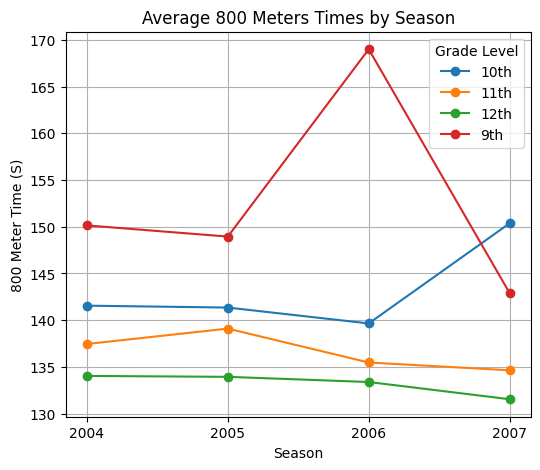

In [27]:
ax = season_sort.pivot(index='Season', columns='Grade Level', values='800 Meters').plot(marker='o',figsize=(6,5))

# set the axis labels and title
ax.set_xlabel('Season')
ax.set_title('Average 800 Meters Times by Season')
ax.set_ylabel('800 Meter Time (S)')

#add a grid and use margins for x axis
ax.grid(visible=True)
ax.margins(x=0.05)

#change the labels for the x axis
tick_positions = [0, 1, 2, 3]
tick_labels = ['2004', '2005', '2006', '2007']
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

#change the legend
ax.legend(['10th', '11th','12th', '9th'], title='Grade Level')

#change style and show plot
plt.style.use("fivethirtyeight")
plt.show()

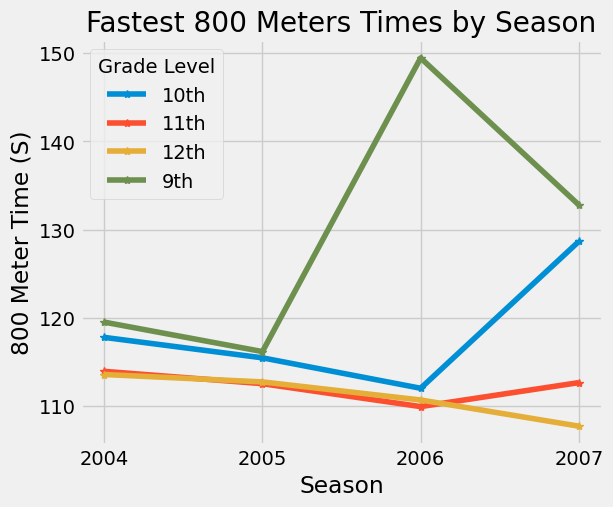

In [28]:
ax = season_sort_min.pivot(index='Season', columns='Grade Level', values='800 Meters').plot(marker='*',figsize=(6,5))

# set the axis labels and title
ax.set_xlabel('Season')
ax.set_title('Fastest 800 Meters Times by Season')
ax.set_ylabel('800 Meter Time (S)')

#add a grid and use margins for x axis
ax.grid(visible=True)
ax.margins(x=0.05)

#change the labels for the x axis
tick_positions = [0, 1, 2, 3]
tick_labels = ['2004', '2005', '2006', '2007']
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

#change the legend
ax.legend(['10th', '11th', '12th', '9th'], title='Grade Level')

#change style and show plot
plt.style.use("fivethirtyeight")
plt.show()

In [29]:
grade_sort = min_df.groupby(['Grade Level', 'Season']).agg({'800 Meters': 'mean'}).sort_values(by=['Grade Level', 'Season'], ascending = True)
grade_sort

800 Meters
Grade Level Season                         
10th Grade  2004 Outdoor Season  141.551069
            2005 Outdoor Season  141.349267
            2006 Outdoor Season  139.648123
            2007 Outdoor Season  150.368077
11th Grade  2004 Outdoor Season  137.449183
            2005 Outdoor Season  139.096567
            2006 Outdoor Season  135.468990
            2007 Outdoor Season  134.633341
12th Grade  2004 Outdoor Season  134.031673
            2005 Outdoor Season  133.933194
            2006 Outdoor Season  133.380100
            2007 Outdoor Season  131.537895
9th Grade   2004 Outdoor Season  150.138281
            2005 Outdoor Season  148.944639
            2006 Outdoor Season  168.998333
            2007 Outdoor Season  142.895000

In [30]:
grade_sort_min = min_df.groupby(['Grade Level', 'Season']).agg({'800 Meters': 'min'}).sort_values(by=['Grade Level', 'Season'], ascending = True)
grade_sort_min

800 Meters
Grade Level Season                         
10th Grade  2004 Outdoor Season      117.77
            2005 Outdoor Season      115.45
            2006 Outdoor Season      112.00
            2007 Outdoor Season      128.65
11th Grade  2004 Outdoor Season      113.92
            2005 Outdoor Season      112.52
            2006 Outdoor Season      109.92
            2007 Outdoor Season      112.64
12th Grade  2004 Outdoor Season      113.56
            2005 Outdoor Season      112.72
            2006 Outdoor Season      110.67
            2007 Outdoor Season      107.70
9th Grade   2004 Outdoor Season      119.50
            2005 Outdoor Season      116.16
            2006 Outdoor Season      149.46
            2007 Outdoor Season      132.80

In [31]:
grade_sort = grade_sort.reset_index()

In [32]:
grade_sort_min = grade_sort_min.reset_index()

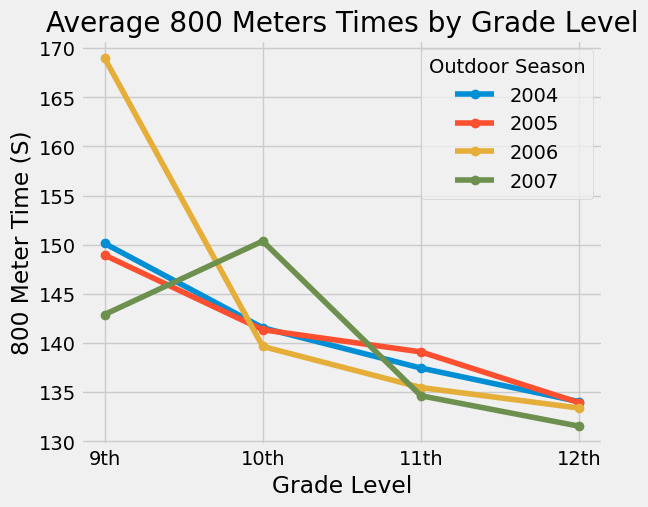

In [33]:
GS = grade_sort.pivot(index='Grade Level', columns='Season', values='800 Meters').sort_values(by=['Grade Level'], key=lambda x: \
                                    x.map({'9th Grade': 0, '10th Grade': 1, '11th Grade': 2, '12th Grade': 3}))
ax = GS.plot(marker='o',figsize=(6,5))

# set the axis labels and title
ax.set_xlabel('Grade Level')
ax.set_title('Average 800 Meters Times by Grade Level')
ax.set_ylabel('800 Meter Time (S)')

#add a grid and use margins for x axis
ax.grid(visible=True)
ax.margins(x=0.05)

#change the labels for the x axis
tick_positions = [0, 1, 2, 3]
tick_labels = ['9th', '10th', '11th', '12th']
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

#change the legend
ax.legend(['2004', '2005', '2006', '2007'], title='Outdoor Season')

#change style and show plot
plt.style.use("fivethirtyeight")
plt.show()

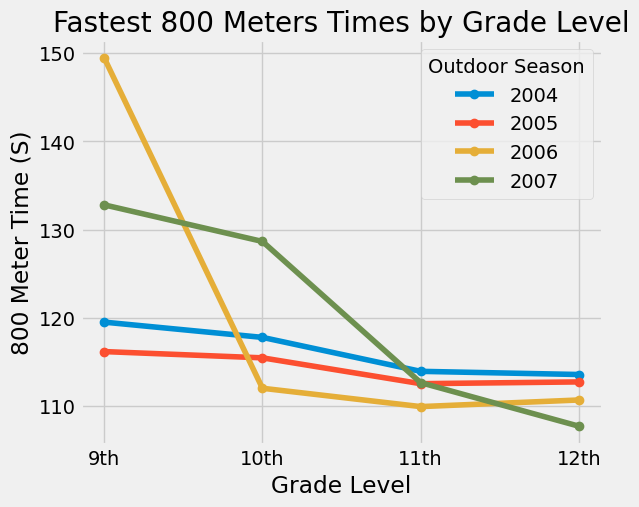

In [34]:
GS_min = grade_sort_min.pivot(index='Grade Level', columns='Season', values='800 Meters').sort_values(by=['Grade Level'], key=lambda x: \
                                    x.map({'9th Grade': 0, '10th Grade': 1, '11th Grade': 2, '12th Grade': 3}))
ax = GS_min.plot(marker='o',figsize=(6,5))

# set the axis labels and title
ax.set_xlabel('Grade Level')
ax.set_title('Fastest 800 Meters Times by Grade Level')
ax.set_ylabel('800 Meter Time (S)')

#add a grid and use margins for x axis
ax.grid(visible=True)
ax.margins(x=0.05)

#change the labels for the x axis
tick_positions = [0, 1, 2, 3]
tick_labels = ['9th', '10th', '11th', '12th']
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

#change the legend
ax.legend(['2004', '2005', '2006', '2007'], title='Outdoor Season')

#change style and show plot
plt.style.use("fivethirtyeight")
plt.show()

When looking at the mean times per grade level/season we can see that for each of these years, the trend is the same. The mean times are consistenly increasing by grade level. This is what we would expect based on an increase in age, maturity, and likely training.

Now, when we group and sort by grade level we see that for the years 2004- 2007 there is not much increase as the seasons increase. This shows us that the runners times have a high correlatation with grade level. This makes it easier to assume that athletes in 9th grade will likely run 60.x, etc. 

In [35]:
unique_pop = min_df.groupby(['Season'])['ID Number'].nunique()
unique_pop

Season
2004 Outdoor Season     891
2005 Outdoor Season    1245
2006 Outdoor Season     739
2007 Outdoor Season     420
Name: ID Number, dtype: int64

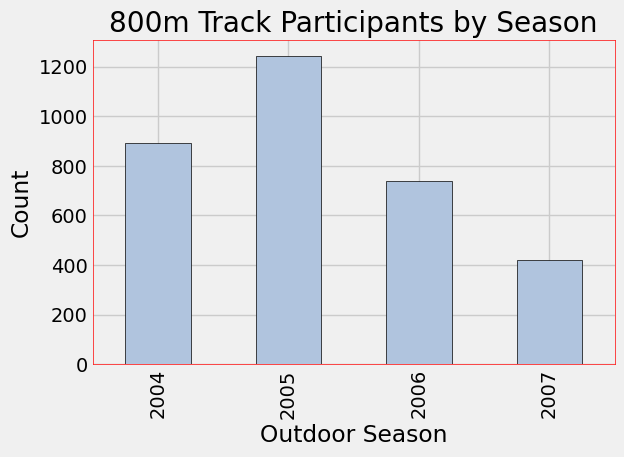

In [36]:
#set the color for the axes border
plt.rc('axes',edgecolor='r',linewidth=0.5)

ax = unique_pop.plot(x='Season', y='Count', kind='bar', legend=False, color='lightsteelblue', edgecolor='black',figsize=(6,4))

#create labels and title
plt.xlabel('Outdoor Season')
plt.ylabel('Count')
plt.title('800m Track Participants by Season')

#change the labels for the x axis
tick_positions = [0, 1, 2, 3]
tick_labels = ['2004', '2005', '2006', '2007']
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

plt.style.use("fivethirtyeight")
plt.show()

To answer the population question. I want to know if our sport has been growing as time goes on. This question is hard to answer because of the sparse data. We can see that for the 2004 and 2005 season, there is a clear increase in athletes/season. This shows big growth. For the 2006 season, we can see that the 9th graders are amost absent from the dataset, but the 10th- 12th graders are a little lower than the previous year. The 2007 year is missing most runners in their 9th and 10th grade year. The 11th and 12th graders are between the count from 2004 and 2005.